In [37]:
# try to use a headless browser to get the number of proposals and votes in realms
# load in realm_deployments.csv
import pandas as pd
df = pd.read_csv('realm_deployments.csv')
df.head()

,platform,platform_id,name,additional,website
0,realms,8AFfcBseGCf4V7j6sNC51YuRVQurLubv6HUDxusPhpxA,NaN,NaN,https://app.realms.today/dao/8AFfcBseGCf4V7j6s...
1,realms,2MXEpXypPempr9wDfWyzGvvpUQFXdjuKykSWMdxAX7DD,NaN,NaN,https://app.realms.today/dao/2MXEpXypPempr9wDf...
2,realms,GBFawwN7Et6JZ4ySiaU86gBXwWeyRMcjCWgD8ee96CKc,NaN,NaN,https://app.realms.today/dao/GBFawwN7Et6JZ4ySi...
3,realms,5g94Ver64ruf9CGBL3k2oQGdKCUt4QKjN7NQojSrHAwH,Jungle DeFi Community DAO,NaN,https://app.realms.today/dao/j-jfi
4,realms,3Am3fe3zvAkJV2uh2t9qG6pUBCnJd4u9ynuAUMiYXaCH,!lluminati DAO,NaN,https://app.realms.today/dao/3Am3fe3zvAkJV2uh2...


In [38]:
# add columns votes_count and proposals_count
import numpy as np
df['proposals_count'] = np.nan
df['proposals_count_error'] = np.nan
df.head()

,platform,platform_id,name,additional,website,votes_count,proposals_count
0,realms,8AFfcBseGCf4V7j6sNC51YuRVQurLubv6HUDxusPhpxA,NaN,NaN,https://app.realms.today/dao/8AFfcBseGCf4V7j6s...,NaN,NaN
1,realms,2MXEpXypPempr9wDfWyzGvvpUQFXdjuKykSWMdxAX7DD,NaN,NaN,https://app.realms.today/dao/2MXEpXypPempr9wDf...,NaN,NaN
2,realms,GBFawwN7Et6JZ4ySiaU86gBXwWeyRMcjCWgD8ee96CKc,NaN,NaN,https://app.realms.today/dao/GBFawwN7Et6JZ4ySi...,NaN,NaN
3,realms,5g94Ver64ruf9CGBL3k2oQGdKCUt4QKjN7NQojSrHAwH,Jungle DeFi Community DAO,NaN,https://app.realms.today/dao/j-jfi,NaN,NaN
4,realms,3Am3fe3zvAkJV2uh2t9qG6pUBCnJd4u9ynuAUMiYXaCH,!lluminati DAO,NaN,https://app.realms.today/dao/3Am3fe3zvAkJV2uh2...,NaN,NaN


In [69]:
# visit the first realm website with a headless browser
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# set up the headless browser
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=1920x1080")
driver = webdriver.Chrome(options=chrome_options)

In [56]:
# wait until driver.find_element('css selector', 'h4.whitespace-nowrap.text-fgd-2.mb-0.font-normal') appears, time out after 10 seconds
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import re

def get_num_proposals_for_realm(realm_website):
    print('getting', realm_website)
    driver.get(realm_website)
    print('waiting...')
    try:
        WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div.space-y-3 > div > a h3')))
    except TimeoutException as e:
        print('timed out')
        return str(e)
    # get the number of proposals and votes
    # proposals = driver.find_elements_by_css_selector('h4.whitespace-nowrap.text-fgd-2.mb-0.font-normal')
    proposals_text = driver.find_element('css selector', 'h4.whitespace-nowrap.text-fgd-2.mb-0.font-normal').text
    # parse the text to get the number like "<number> Proposals"
    num_proposals_string = re.findall(r'\d*+', proposals_text)[0]
    num_proposals = int(num_proposals_string)
    print('num_proposals', num_proposals)
    return num_proposals

In [58]:
# run the function on all rows
for index, row in df.iterrows():
    # if proposals_count or proposals_count_error is not nan, skip
    if not pd.isnull(row['proposals_count']) or not pd.isnull(row['proposals_count_error']):
        print('skipping', row['website'])
        continue
    realm_website = row['website']
    num_proposals = get_num_proposals_for_realm(realm_website)
    if type(num_proposals) == str:
        df.at[index, 'proposals_count_error'] = num_proposals
    else:
        df.at[index, 'proposals_count'] = num_proposals


skipping https://app.realms.today/dao/8AFfcBseGCf4V7j6sNC51YuRVQurLubv6HUDxusPhpxA
skipping https://app.realms.today/dao/2MXEpXypPempr9wDfWyzGvvpUQFXdjuKykSWMdxAX7DD
skipping https://app.realms.today/dao/GBFawwN7Et6JZ4ySiaU86gBXwWeyRMcjCWgD8ee96CKc
skipping https://app.realms.today/dao/j-jfi
skipping https://app.realms.today/dao/3Am3fe3zvAkJV2uh2t9qG6pUBCnJd4u9ynuAUMiYXaCH
skipping https://app.realms.today/dao/ukraineunchained
skipping https://app.realms.today/dao/EYd22AfkwBX4dsoh6HpQsK83f9R22GRusa8UPqnDn58t
skipping https://app.realms.today/dao/9mJUsn6pwUytW2TdytEDRajKDHBjqXsbXyKFP28fzaZ6
skipping https://app.realms.today/dao/01%20exchange
skipping https://app.realms.today/dao/Fvg7EYzS3z9AyC4ecCXxwfuddhRmkhwxiJJR3iLFBDDU
skipping https://app.realms.today/dao/1sol
skipping https://app.realms.today/dao/21dao
skipping https://app.realms.today/dao/JRjgCLYH6m9jxDJSRQ8UqFKmiBG6JaexWYZhLE6WXmr
skipping https://app.realms.today/dao/Eq9AYwVCzYu9A3gBK295c3eyhN4K8h1pCaPQbzYkDgNR
skipping https:/

In [52]:
# save to csv
df.to_csv('realm_deployments_temp.csv', index=False)
df.head()

,platform,platform_id,name,additional,website,votes_count,proposals_count,proposals_count_error
0,realms,8AFfcBseGCf4V7j6sNC51YuRVQurLubv6HUDxusPhpxA,NaN,NaN,https://app.realms.today/dao/8AFfcBseGCf4V7j6s...,NaN,NaN,Message: \nStacktrace:\n0 chromedriver ...
1,realms,2MXEpXypPempr9wDfWyzGvvpUQFXdjuKykSWMdxAX7DD,NaN,NaN,https://app.realms.today/dao/2MXEpXypPempr9wDf...,NaN,NaN,Message: \nStacktrace:\n0 chromedriver ...
2,realms,GBFawwN7Et6JZ4ySiaU86gBXwWeyRMcjCWgD8ee96CKc,NaN,NaN,https://app.realms.today/dao/GBFawwN7Et6JZ4ySi...,NaN,NaN,Message: \nStacktrace:\n0 chromedriver ...
3,realms,5g94Ver64ruf9CGBL3k2oQGdKCUt4QKjN7NQojSrHAwH,Jungle DeFi Community DAO,NaN,https://app.realms.today/dao/j-jfi,NaN,7.0,NaN
4,realms,3Am3fe3zvAkJV2uh2t9qG6pUBCnJd4u9ynuAUMiYXaCH,!lluminati DAO,NaN,https://app.realms.today/dao/3Am3fe3zvAkJV2uh2...,NaN,2.0,NaN


In [59]:
# how many have either a nan in both  or proposals_count_error?
df[(df['proposals_count'].isna()) & (df['proposals_count_error'].isna())].shape

(0, 8)

In [60]:
# save as first pass
df.to_csv('realm_deployments_proposals_first_pass.csv', index=False)

In [61]:
# TODO: add a second pass column to the csv, and then run the second pass
df['proposals_count_second_pass_error'] = np.nan
df.head()

,platform,platform_id,name,additional,website,votes_count,proposals_count,proposals_count_error,proposals_count_second_pass_error
0,realms,8AFfcBseGCf4V7j6sNC51YuRVQurLubv6HUDxusPhpxA,NaN,NaN,https://app.realms.today/dao/8AFfcBseGCf4V7j6s...,NaN,NaN,Message: \nStacktrace:\n0 chromedriver ...,NaN
1,realms,2MXEpXypPempr9wDfWyzGvvpUQFXdjuKykSWMdxAX7DD,NaN,NaN,https://app.realms.today/dao/2MXEpXypPempr9wDf...,NaN,NaN,Message: \nStacktrace:\n0 chromedriver ...,NaN
2,realms,GBFawwN7Et6JZ4ySiaU86gBXwWeyRMcjCWgD8ee96CKc,NaN,NaN,https://app.realms.today/dao/GBFawwN7Et6JZ4ySi...,NaN,NaN,Message: \nStacktrace:\n0 chromedriver ...,NaN
3,realms,5g94Ver64ruf9CGBL3k2oQGdKCUt4QKjN7NQojSrHAwH,Jungle DeFi Community DAO,NaN,https://app.realms.today/dao/j-jfi,NaN,7.0,NaN,NaN
4,realms,3Am3fe3zvAkJV2uh2t9qG6pUBCnJd4u9ynuAUMiYXaCH,!lluminati DAO,NaN,https://app.realms.today/dao/3Am3fe3zvAkJV2uh2...,NaN,2.0,NaN,NaN


In [62]:
# how many rows have a proposals_count_error?
df[df['proposals_count_error'].notna()].shape

(220, 9)

In [70]:
# for all of the rows that have a nan in proposals_count and nan in proposals_count_second_pass_error, run the function again
for index, row in df.iterrows():
    if pd.isnull(row['proposals_count']) and pd.isnull(row['proposals_count_second_pass_error']):
        realm_website = row['website']
        num_proposals = get_num_proposals_for_realm(realm_website)
        if type(num_proposals) == str:
            df.at[index, 'proposals_count_second_pass_error'] = num_proposals
        else:
            df.at[index, 'proposals_count'] = num_proposals

getting https://app.realms.today/dao/2TpcKtkc1hUrzXTFS8RF5wZvrQxw87JPuKcERYTprURm
waiting...
timed out
getting https://app.realms.today/dao/ATQNsQUGjRcj8hnKVq9YEjC39BvDxuUCbZjCG1G2dExF
waiting...
timed out
getting https://app.realms.today/dao/panzerdogs
waiting...
timed out
getting https://app.realms.today/dao/parcl
waiting...
timed out
getting https://app.realms.today/dao/pbn3%20paul%20barron%20network
waiting...
timed out
getting https://app.realms.today/dao/CQCjCNrq43CTiGyCkLqVo7aUw7CT4ZnAQsw6oqnRy6Pv
waiting...
timed out
getting https://app.realms.today/dao/plantoids
waiting...
timed out
getting https://app.realms.today/dao/polar
waiting...
timed out
getting https://app.realms.today/dao/port%20finance
waiting...
timed out
getting https://app.realms.today/dao/portals
waiting...
timed out
getting https://app.realms.today/dao/primitives
waiting...
timed out
getting https://app.realms.today/dao/DvufAghHr42Jvnsq3vJSDf91zCSKcBTFRpzmq3u9BKzp
waiting...
timed out
getting https://app.realms

In [71]:
# how many have a second pass error?
df[df['proposals_count_second_pass_error'].notna()].shape
# how many have a nan in proposals_count, a first pass error and no second pass error?
df[(df['proposals_count'].isna()) & (df['proposals_count_error'].notna()) & (df['proposals_count_second_pass_error'].isna())].shape

(0, 9)

In [72]:
# save as second pass temp
df.to_csv('realm_deployments_proposals_second_pass_temp.csv', index=False)

In [73]:
df.head()

,platform,platform_id,name,additional,website,votes_count,proposals_count,proposals_count_error,proposals_count_second_pass_error
0,realms,8AFfcBseGCf4V7j6sNC51YuRVQurLubv6HUDxusPhpxA,NaN,NaN,https://app.realms.today/dao/8AFfcBseGCf4V7j6s...,NaN,NaN,Message: \nStacktrace:\n0 chromedriver ...,Message: \nStacktrace:\n0 chromedriver ...
1,realms,2MXEpXypPempr9wDfWyzGvvpUQFXdjuKykSWMdxAX7DD,NaN,NaN,https://app.realms.today/dao/2MXEpXypPempr9wDf...,NaN,NaN,Message: \nStacktrace:\n0 chromedriver ...,Message: \nStacktrace:\n0 chromedriver ...
2,realms,GBFawwN7Et6JZ4ySiaU86gBXwWeyRMcjCWgD8ee96CKc,NaN,NaN,https://app.realms.today/dao/GBFawwN7Et6JZ4ySi...,NaN,NaN,Message: \nStacktrace:\n0 chromedriver ...,Message: \nStacktrace:\n0 chromedriver ...
3,realms,5g94Ver64ruf9CGBL3k2oQGdKCUt4QKjN7NQojSrHAwH,Jungle DeFi Community DAO,NaN,https://app.realms.today/dao/j-jfi,NaN,7.0,NaN,NaN
4,realms,3Am3fe3zvAkJV2uh2t9qG6pUBCnJd4u9ynuAUMiYXaCH,!lluminati DAO,NaN,https://app.realms.today/dao/3Am3fe3zvAkJV2uh2...,NaN,2.0,NaN,NaN


In [75]:
# how many rows have a value in proposals count and nan in proposals_count_error and nan in proposals_count_second_pass_error?
df[(df['proposals_count'].notna()) & (df['proposals_count_error'].isna()) & (df['proposals_count_second_pass_error'].isna())].shape

(210, 9)

In [76]:
# count the number of rows with a value in proposals count, a value in proposals_count_error and nan in proposals_count_second_pass_error
df[(df['proposals_count'].notna()) & (df['proposals_count_error'].notna()) & (df['proposals_count_second_pass_error'].isna())].shape

(0, 9)

In [79]:
# how many have a nan in proposals_count?
df[df['proposals_count'].isna()].shape

(220, 9)

In [80]:
filtered_df = df.copy()
filtered_df.shape

(430, 9)

In [81]:
# remove nas from proposals_count
filtered_df = filtered_df[filtered_df['proposals_count'].notna()]
filtered_df.shape

(210, 9)

<Axes: >

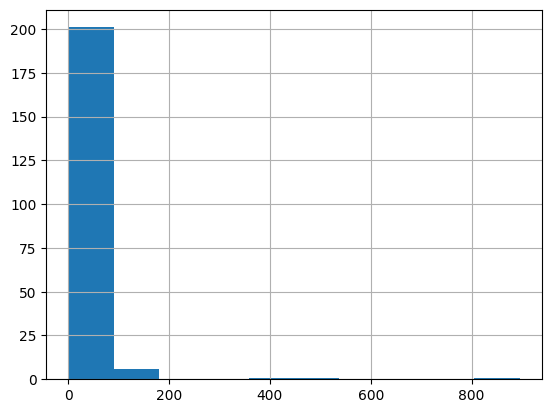

In [82]:
# hist of proposals_count
filtered_df['proposals_count'].hist()

In [83]:
# remove rows with proposals_count < 10
filtered_df = filtered_df[filtered_df['proposals_count'] >= 10]
filtered_df.shape

(89, 9)

In [86]:
# remove the error cols
filtered_df = filtered_df.drop(columns=['proposals_count_error', 'proposals_count_second_pass_error'])
filtered_df.head()

,platform,platform_id,name,additional,website,votes_count,proposals_count
10,realms,26yUdUTWSfpwpNMshahupbXoQKi2NkaTECSyE45VMutU,1Sol DAO,NaN,https://app.realms.today/dao/1sol,NaN,12.0
11,realms,Dn5yLFi6ZNhkD25CX4c8qq1MV3CC2vcrH2Qujfzy22rT,21DAO,NaN,https://app.realms.today/dao/21dao,NaN,59.0
22,realms,BZE9AiJrMxUXXjwy9iBPzj34Wh5Zf1wLEFAM4oSSMRLi,Allie Coin DAO,NaN,https://app.realms.today/dao/allie,NaN,16.0
24,realms,9u3s1APW4JDxt4a2p666rYYoa3UErcT12fvNKWNFqaj7,Alpha Illuminati DAO,NaN,https://app.realms.today/dao/alpha%20illuminat...,NaN,15.0
34,realms,CErE41LChpKNpRKpcRKkbmYbEs8PiVcoKQpHUqryy7gm,AthensDAO,NaN,https://app.realms.today/dao/athensdao,NaN,11.0


In [87]:
# save as filtered
filtered_df.to_csv('realm_deployments_proposals_filtered.csv', index=False)